# Reproducible workflows for whole-brain transcriptomics

Presented for NEUR 608, Neuroimaging Data Science (FA2020) by [Ross Markello](https://rossmarkello.com).

### Relevant citations

- Arnatkevic̆iūtė A, Fulcher BD, Fornito A. (2018). A practical guide to linking brain-wide gene expression and neuroimaging data. *NeuroImage*, 189, 353-67. doi:[10.1016/j.neuroimage.2019.01.011](https://doi.org/10.1016/j.neuroimage.2019.01.011).

- Markello, R, Shafiei, G, Zheng, Y-Q, Misic, B. (2020). `abagen`: A toolbox for the Allen Brain Atlas genetics data. Zenodo, doi:[10.5281/zenodo.3451463](https://doi.org/10.5281/zenodo.3451463).

Note: This presentation was created in a [Jupyter notebook](https://jupyter.org/) with the [RISE extension](https://rise.readthedocs.io/en/stable/).

You can access the original Jupyter notebook at: https://bit.ly/rmarkello_neur608_20201016

All that to say, when you see a cell like this:

In [1]:
print('this is code!')

this is code!


you should run the command in your Python terminal (but only if you want to follow along with the demo yourself!).

## Before we begin: Installing `abagen`

You'll need a working installation of Python 3.6+ and then you can run:

```
$ pip install --upgrade abagen
```

(`--upgrade` will ensure you install the newest version just released ~yesterday!)

Verify that abagen is installed correctly by typing:
    
```
$ abagen --version
```

(You should see: `abagen 0.0.7`!)

Finally, open up a python terminal (type `python` in your terminal) and run the following two commands (which we'll let run in the background for a bit!):

In [2]:
import abagen
files = abagen.fetch_microarray(donors='all', n_proc=-1)

# The [Allen Human Brain Atlas](https://human.brain-map.org) (AHBA)

<center><img src="ahba.png" alt="Allen Human Brain Atlas" style="width: 1800px"\></center>

## AHBA: By the numbers

- 6 post-mortem donor brains (24-57 years of age, 5 males)

- 3,702 spatially-distinct tissue samples

- 58,692 unique microarray probes indexing >20,000 distinct genes

## AHBA: Gene expression in the wild

- Impacts on functional connectivity within resting state networks (e.g, Richiardi et al., 2015, _Science_)

- Relation to temporal and topological properties of large-scale functional networks (Vértes et al., 2016, _Phil Trans R Soc B_)

<center><img src="vertes2016.jpg" alt="Vertes et al., 2016, Phil Trans R Soc B" style="height: 1100px"\></center>

## AHBA: Gene expression in the wild

- Impacts on functional connectivity within resting state networks (e.g, Richiardi et al., 2015, _Science_)

- Relation to temporal and topological properties of large-scale functional networks (Vértes et al., 2016, _Phil Trans R Soc B_)

- Regional maturation during adolescent brain development (Whitaker, Vértes, et al., 2016, _PNAS_)

<center><img src="whitakervertes2016.jpg" alt="Figure from Whitaker, Vertes et al., 2016, PNAS" style="height: 1040px"\></center>

## AHBA: Gene expression in the wild

- Impacts on functional connectivity within resting state networks (e.g, Richiardi et al., 2015, _Science_)

- Relation to temporal and topological properties of large-scale functional networks (Vértes et al., 2016, _Phil Trans R Soc B_)

- Regional maturation during adolescent brain development (Whitaker, Vértes, et al., 2016, _PNAS_)

- Functional specialization of brain regions (Anderson et al., 2018, _Nat Commun_)

<center><img src="anderson.jpg" alt="Figure from Anderson et al., 2018, Nat Commun" style="height: 1000px"\></center>

# [`abagen`](https://github.com/rmarkello/abagen): A toolbox$^{*}$ for the Allen Human Brain Atlas$^{**}$

($^{*}$More of a workflow, really)

($^{**}$Also has some functionality for working with mouse data$^{†}$)

($^{†}$We won't get into that here, though)

## Motivation behind `abagen`

- **Primary**: Make it as easy as possible for our lab to—reproducibly + transparently—prepare AHBA data for analysis

- **Secondary**: Develop a community-driven, open-source Python toolbox so people stop _reinventing the wheel_ to process AHBA data

- **Tertiary**: Procrastinate working on a different PhD project

## `abagen` quickstart

Three(-ish) lines of code to get you parcellated microarray expression data from the AHBA:

In [3]:
import abagen

In [4]:
atlas = abagen.fetch_desikan_killiany()

In [5]:
expression = abagen.get_expression_data(atlas['image'])

INFO: Group-level atlas provided; using MNI coordinates for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 31569 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15633 genes remain after probe filtering + selection
INFO: 771 / 904 samples matched to regions for donor #9861
INFO: 685 / 845 samples matched to regions for donor #10021
INFO: 271 / 353 samples matched to regions for donor #12876
INFO: 414 / 513 samples matched to regions for donor #14380
INFO: 366 / 437 samples matched to regions for donor #15496
INFO: 320 / 414 samples matched to regions for donor #15697
INFO: Aggregating samples to regions with provided region_agg: donors
INFO: Dropping 0 gene from concatenated expression data due to poor normalization


In [6]:
expression.head()

gene_symbol,A1BG,A1BG-AS1,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
label,,,,,,,,,,,,,,,,,,,,,
1,0.586156,0.681968,0.456908,0.376798,0.458322,0.495414,0.497632,0.870564,0.445209,0.629681,...,0.492343,0.632688,0.589239,0.426403,0.509227,0.428817,0.748770,0.629679,0.374947,0.488809
2,0.519457,0.649407,0.391291,0.417994,0.502192,0.461924,0.363597,0.804507,0.550718,0.524759,...,0.531772,0.632074,0.452754,0.470452,0.559990,0.477254,0.739577,0.552037,0.293777,0.563252
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.584332,0.693055,0.389392,0.365175,0.390823,0.507872,0.431360,0.814052,0.425373,0.599436,...,0.465810,0.675556,0.571671,0.438606,0.453233,0.413996,0.714243,0.582303,0.335031,0.609565
5,0.618589,0.653087,0.531019,0.402368,0.428763,0.514913,0.602692,0.814974,0.361631,0.617771,...,0.589992,0.613562,0.453932,0.412923,0.401131,0.422016,0.712313,0.705803,0.410380,0.651239


## Raw AHBA data

<center><img src="fig1.jpg" alt="Donor-specific expression" style="height: 1000px;"/></center>

## Fetching the raw data

The raw data provided in the AHBA aren't "raw", _per se_, but aren't analysis ready, either:

Let's take a look:

In [7]:
files = abagen.fetch_microarray(donors='all')
print(files.keys())

dict_keys(['9861', '10021', '12876', '14380', '15496', '15697'])


In [8]:
print(files['9861'].keys())

dict_keys(['microarray', 'ontology', 'pacall', 'probes', 'annotation'])


In [9]:
print(files['9861']['microarray'])

/Users/rmarkello/abagen-data/microarray/normalized_microarray_donor9861/MicroarrayExpression.csv


## Loading the raw data

The `abagen.io` module has a number of `read_X()` functions to load the different "raw" data files provided with the AHBA.

There is a unique `read_X()` function for each filetype from the AHBA; all these functions will return a pandas.DataFrame object:

In [10]:
abagen.io.read_microarray(files['9861']['microarray']).head()

sample_id,0,1,2,3,4,5,6,7,8,9,...,936,937,938,939,940,941,942,943,944,945
probe_id,,,,,,,,,,,,,,,,,,,,,
1058685,3.615792,2.138074,2.480542,2.964972,2.679803,1.856238,2.280435,3.080857,2.628575,2.358912,...,3.852665,3.849358,3.018556,3.203562,2.050227,3.487880,2.354469,2.586168,3.495279,3.306209
1058684,1.574380,1.687217,1.975735,2.089475,1.912586,1.601138,1.626724,1.855901,1.858343,1.789023,...,1.698639,2.106493,1.573482,2.028703,2.058318,1.620506,1.802832,1.698847,1.839290,1.703562
1058683,1.596431,1.948371,2.191910,2.224042,2.223798,1.557563,1.940634,2.337132,2.253177,1.839538,...,1.879796,1.576539,1.835648,1.664253,2.195771,1.832431,1.993473,1.864939,2.073033,1.907132
1058682,4.482883,6.606044,5.261559,4.013277,5.600743,5.624775,4.552105,4.276418,5.675885,5.686694,...,4.336135,4.904766,4.305006,5.202678,4.121053,4.507000,4.123025,4.020838,4.222393,4.523669
1058681,6.291312,8.149890,7.948218,6.964453,8.682156,7.753634,7.462767,6.998209,7.565414,7.309235,...,6.999358,6.289043,6.515205,6.893379,6.473620,6.326008,6.264416,5.800701,5.901888,6.491646


In [11]:
abagen.io.read_annotation(files['9861']['annotation']).head()

,structure_id,slab_num,well_id,slab_type,structure_acronym,structure_name,polygon_id,mri_voxel_x,mri_voxel_y,mri_voxel_z,mni_x,mni_y,mni_z
sample_id,,,,,,,,,,,,,
0,4077,22,594,CX,PCLa-i,"paracentral lobule, anterior part, right, infe...",37470,87,52,116,5.9,-27.7,49.7
1,4323,11,2985,CX,Cl,"claustrum, right",40517,66,92,63,29.2,17.0,-2.9
2,4323,18,2801,CX,Cl,"claustrum, right",41516,66,81,104,28.2,-22.8,16.8
3,4440,18,2273,CX,LGd,"dorsal lateral geniculate nucleus, left",41473,116,94,101,-24.6,-24.6,1.3
4,4266,17,2785,CX,CA4,"CA4 field, right",41142,63,104,106,31.1,-31.3,-7.3


In [12]:
abagen.io.read_probes(files['9861']['probes']).head()

,probe_name,gene_id,gene_symbol,gene_name,entrez_id,chromosome
probe_id,,,,,,
1058685,A_23_P20713,729,C8G,"complement component 8, gamma polypeptide",733.0,9
1058684,CUST_15185_PI416261804,731,C9,complement component 9,735.0,5
1058683,A_32_P203917,731,C9,complement component 9,735.0,5
1058682,A_23_P138819,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11
1058681,A_24_P232500,736,MRPL49,mitochondrial ribosomal protein L49,740.0,11


## Getting analysis-ready data 

<center><img src="fig2.jpg" alt="Transcriptomic processing pipeline"/></center>

## Options, options

The *only* required parameter for `abagen.get_expression_data()` is your parcellation image (e.g., `atlas['image']`).

But, there are a LOT of parameters...

In [13]:
import inspect
print(inspect.signature(abagen.get_expression_data))

(atlas, atlas_info=None, *, ibf_threshold=0.5, probe_selection='diff_stability', donor_probes='aggregate', lr_mirror=False, exact=True, tolerance=2, sample_norm='srs', gene_norm='srs', norm_matched=True, region_agg='donors', agg_metric='mean', corrected_mni=True, reannotated=True, return_counts=False, return_donors=False, donors='all', data_dir=None, verbose=1, n_proc=1)


We're...not going to go through all of these—but we will touch on a few as they relate to the article!

(For a thorough treatment of all the parameters, check out our [documentation](https://abagen.readthedocs.io)!)

# Intensity-based filtering

<center><img src="fig3.jpg" alt="Intensity-based filtering"/></center>

## Why change the IBF threshold?

1. Is "correlation between probes" a valid metric for determining a threshold?

2. IBF will remove some genes entirely—it's possible to have hypothesis-driven reasons for wanting to investigate those!

## Intensity-based filtering in `abagen`

- Controlled via the `ibf_threshold` parameter, which can range from 0 to 1

- Defaults to `ibf_threshold=0.5`

# Probe selection methods

<center><img src="fig4.jpg" alt="Probe selection methods"/></center>

## Why change the probe selection method?

1. Precedent: different papers have done different things!

2. Comparisons to RNA-seq: a true gold standard?

## Probe selection methods in `abagen`

- Controlled via the `probe_selection` parameter, which defaults to using differential stability

- Includes options:
    1. `'average'`
    1. `'max_intensity'`
    1. `'max_variance'`
    1. `'pc_loading'`
    1. `'corr_variance'`
    1. `'corr_intensity'`
    1. `'diff_stability'`
    1. `'rnaseq'`

# Constraining sample-to-region matching

<center><img src="fig5.jpg" alt="Constraining sample-to-region matching"/></center>

## Why (not) constrain sample-to-region matching?

1. Constrain: Improves accuracy of anatomical localization

2. Don't constrain: Fewer samples assigned --> losing (very precious!) information

## Defining your parcellation

`abagen` can constrain sample-to-region matching, but it's not _quite_ so simple as just changing a single parameter!

Let's take a look at the DK atlas shipped with `abagen`:

In [14]:
atlas = abagen.fetch_desikan_killiany()

The `atlas` object returned by `abagen.fetch_desikan_killiany()` is a dictionary with two keys: `'image'` and `'info'`:

In [15]:
print(atlas['image'], atlas['info'], sep='\n')

/Users/rmarkello/gitrepos/abagen/abagen/data/atlas-desikankilliany.nii.gz
/Users/rmarkello/gitrepos/abagen/abagen/data/atlas-desikankilliany.csv


The .nii.gz image is just a standard parcellation image. The format of CSV file, however, is what we're interested in now:

In [16]:
import pandas as pd
pd.read_csv(atlas['info']).head()

,id,label,hemisphere,structure
0,1,lateralorbitofrontal_rh,R,cortex
1,2,parsorbitalis_rh,R,cortex
2,3,frontalpole_rh,R,cortex
3,4,medialorbitofrontal_rh,R,cortex
4,5,parstriangularis_rh,R,cortex


## Providing atlas info

We can provide this CSV file to the `abagen.get_expression_data()` function via the `atlas_info` parameter to constrain matching.

We can also specify a distance `tolerance` beyond which samples will not be matched to regions.

When making your own CSV file, you can use the `check_atlas_info()` function to confirm it is appropriately formed:

In [17]:
atlas_info = abagen.utils.check_atlas_info(atlas['image'], atlas['info'])
atlas_info.head()

,label,hemisphere,structure
id,,,
1,lateralorbitofrontal_rh,R,cortex
2,parsorbitalis_rh,R,cortex
3,frontalpole_rh,R,cortex
4,medialorbitofrontal_rh,R,cortex
5,parstriangularis_rh,R,cortex


# Donor normalization

<center><img src="fig6.jpg" alt="Gene normalization"/></center>

## Why change the normalization method?

1. Differences between donors may be important or interesting

2. Scaled robust sigmoid function is relatively "non-standard"

## Normalization, two ways

We can normalize the expression matrix for each donor two ways: across columns (i.e., row-wise) or across rows (i.e., column-wise).

The "default" way of thinking about normalization is column-wise, but there are considerations for why you might want to do _both_ in the AHBA.

`abagen` provides two parameters for controlling these normalization procedures: `gene_norm` (column-wise normalization) and `sample_norm` (row-wise normalization).

## Normalization, nine ways

- Both `gene_norm` and `sample_norm` are set to use the scaled robust sigmoid function by default

- All options include:
    1. `'center'`
    1. `'zscore'`
    1. `'minmax'`
    1. `'sigmoid'`
    1. `'scaled_sigmoid'`
    1. `'scaled_sigmoid_quantiles'`
    1. `'robust_sigmoid`'
    1. `'scaled_robust_sigmoid'`
    1. `'mixed_sigmoid'`

# All together, now

We're going to run the `abagen.get_expression_data()` workflow two ways (changing all the options we discussed) and see how different the resulting expression matrices are:

In [18]:
first = abagen.get_expression_data(atlas['image'], atlas_info=None, tolerance=0,
                                   ibf_threshold=0, probe_selection='average', 
                                   gene_norm=None, sample_norm=None)

INFO: Group-level atlas provided; using MNI coordinates for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.0
INFO: 45821 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: average
INFO: 20232 genes remain after probe filtering + selection
INFO: 539 / 904 samples matched to regions for donor #9861
INFO: 504 / 845 samples matched to regions for donor #10021
INFO: 191 / 353 samples matched to regions for donor #12876
INFO: 282 / 513 samples matched to regions for donor #14380
INFO: 278 / 437 samples matched to regions for donor #15496
INFO: 223 / 414 samples matched to regions for donor #15697
INFO: Aggregating samples to regions with provided region_agg: donors
INFO: Dropping 0 gene from concatenated expression data due to poor normalization


In [19]:
second = abagen.get_expression_data(atlas['image'], atlas_info=atlas['info'], tolerance=2,
                                    ibf_threshold=0.5, probe_selection='diff_stability',
                                    gene_norm='srs', sample_norm='srs')

INFO: Group-level atlas provided; using MNI coordinates for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 31569 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15633 genes remain after probe filtering + selection
INFO: 737 / 904 samples matched to regions for donor #9861
INFO: 653 / 845 samples matched to regions for donor #10021
INFO: 254 / 353 samples matched to regions for donor #12876
INFO: 393 / 513 samples matched to regions for donor #14380
INFO: 357 / 437 samples matched to regions for donor #15496
INFO: 306 / 414 samples matched to regions for donor #15697
INFO: Aggregating samples to regions with provided region_agg: donors
INFO: Dropping 0 gene from concatenated expression data due to poor normalization


Let's take a look at those outputs:

In [20]:
first.shape, second.shape

((83, 20232), (83, 15633))

In [21]:
first.head()

gene_symbol,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
label,,,,,,,,,,,,,,,,,,,,,
1,5.064230,6.336709,1.939552,7.994086,4.779077,2.886784,3.753980,1.800892,5.506346,5.925152,...,5.279338,3.846997,5.713301,6.655844,6.426669,2.362768,7.813073,6.809924,8.358709,6.467200
2,5.222496,6.288014,1.944873,8.026968,4.736483,2.957569,3.522940,1.740774,5.383936,6.039668,...,5.097160,3.773234,5.698729,6.790200,6.324799,2.026578,7.913221,6.728440,8.249874,6.574508
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.961304,6.368020,1.946954,7.985006,4.646705,2.862636,3.886428,1.783832,5.457923,5.963303,...,5.393161,3.793873,5.602328,6.535905,6.403028,2.039945,7.810693,6.840441,8.249244,6.584268
5,5.076635,6.204555,2.000418,8.178108,4.830417,2.928000,3.562473,1.971135,5.683821,5.967246,...,5.190318,3.701824,5.647284,6.466618,6.372863,2.187355,7.633402,6.914736,8.353904,6.452066


In [22]:
second.head()

gene_symbol,A1BG,A1BG-AS1,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
label,,,,,,,,,,,,,,,,,,,,,
1,0.589953,0.681338,0.458420,0.376497,0.459068,0.498341,0.501912,0.870004,0.446275,0.627343,...,0.494021,0.630781,0.588672,0.417151,0.509677,0.428733,0.747304,0.628172,0.374296,0.487883
2,0.522952,0.648717,0.390436,0.418098,0.502325,0.462849,0.366790,0.803438,0.552393,0.521628,...,0.533568,0.629665,0.452276,0.460873,0.561362,0.477385,0.738087,0.552265,0.292999,0.562721
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.594355,0.692399,0.374664,0.339728,0.393235,0.504311,0.443977,0.807438,0.417533,0.586584,...,0.476738,0.692243,0.565924,0.402528,0.431880,0.415917,0.711798,0.582940,0.336172,0.615471
5,0.623098,0.652317,0.533122,0.401903,0.429839,0.518609,0.607626,0.814253,0.361652,0.615366,...,0.592102,0.611487,0.452955,0.403203,0.400692,0.421926,0.710485,0.704168,0.410518,0.651457


Finally, we can check the correlation between matching columns to see how "similar" the expression profiles are:

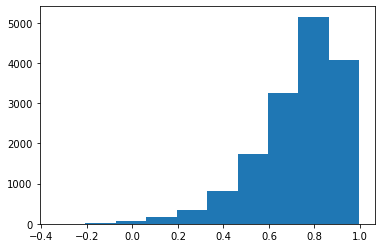

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# find overlapping columns
common_genes = np.intersect1d(first.columns, second.columns)

# get rid of NaNs (correlations don't like those...)
first, second = first.dropna(how='all'), second.dropna(how='all')

# correlate matching columns
correlations = abagen.utils.efficient_corr(first[common_genes], second[common_genes])

# plot histogram
plt.hist(correlations);

## Summary

- The Allen Human Brain Atlas provides the most spatially-comprehensive dataset of gene expression in the human brain

- `abagen` provides a workflow for processing that data + preparing it for (most) analyss

- There are a number of options + parameters to consider when running the workflow, but there is, ultimately, no "right" answer

## Resources / further reading

- Allen Human Brain Atlas: [human.brain-map.org](https://human.brain-map.org)
- `abagen`: [github.com/rmarkello/abagen](https://github.com/rmarkello/abagen)
- `abagen` documentation: [abagen.readthedocs.io](https://abagen.readthedocs.io)
- Arnatkevic̆iūtė et al., 2018, _NeuroImage_: [doi.org/10.1016/j.neuroimage.2019.01.011](https://doi.org/10.1016/j.neuroimage.2019.01.011)